LIBRARIES

In [13]:
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

DATASET

In [2]:
diamonds = pd.read_csv('../data/processed/diamonds_explored.csv')
diamonds

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
47519,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
47520,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
47521,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
47522,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


ENCODING CATEGORICAL FEATURES

In [4]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')], axis=1)

diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


DIMENSIONALITY REDUCTION WITH PCA

C:\Users\UserID\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


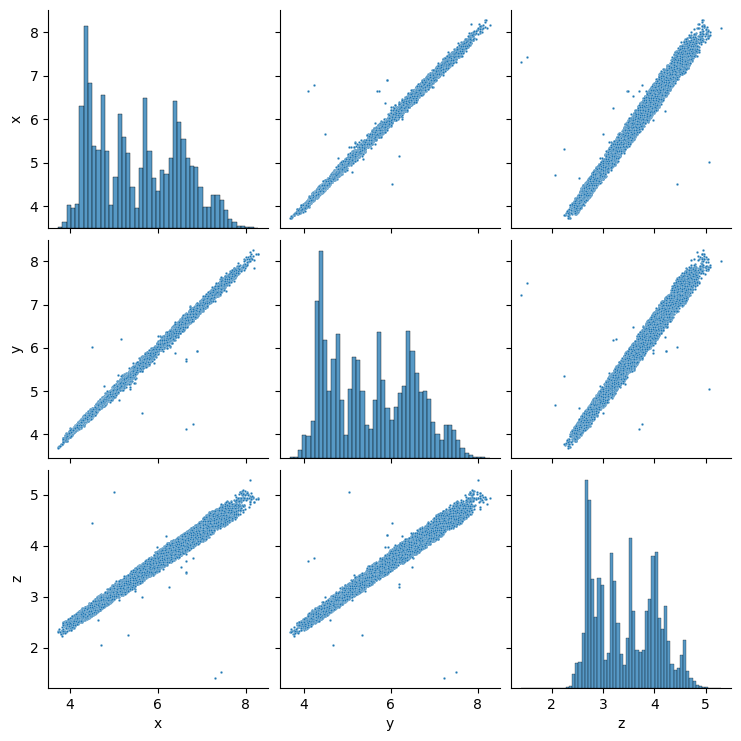

In [6]:
sns.pairplot(diamonds[['x', 'y', 'z']], plot_kws={'s': 3})

In [8]:
pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x', 'y', 'z']])
princ_comp = pca.transform(diamonds[['x', 'y', 'z']])

In [9]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [10]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

In [11]:
diamonds.head()

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
2,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
3,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
4,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


In [15]:
diamonds.to_csv('../data/processed/diamonds_prepared.csv', index=False)